<a href="https://colab.research.google.com/github/nilanahar/MMAI_894_DeepLearning_Project_TeamRosedale/blob/main/MMAI_894_Team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import json

# Load the JSON data from a file
with open('C:/Users/ziang/OneDrive/Desktop/Smith/MMAI 894/abstract_v002_train2015_annotations.json', 'r') as file:
    data = json.load(file)


In [ ]:
import pandas as pd

# Normalize the annotations data
annotations = data['annotations']
df = pd.json_normalize(annotations, record_path=['answers'],
                       meta=['question_type', 'multiple_choice_answer', 'image_id', 'answer_type', 'question_id'])


In [ ]:
print(df.head())

## Overall Information (maybe useless）

In [ ]:
def summarize_dataset(data, df):
    print("=== Dataset Summary ===\n")

    # 1. Dataset Info
    print("1. Dataset Info:")
    for key, value in data['info'].items():
        print(f"   {key}: {value}")
    print("\n")

    # 2. Data Type and Subtype
    print("2. Data Type and Subtype:")
    print(f"   Data Type: {data['data_type']}")
    print(f"   Data Subtype: {data['data_subtype']}\n")

    # 3. License Information
    print("3. License Information:")
    for key, value in data['license'].items():
        print(f"   {key}: {value}")
    print("\n")

    # 4. Annotations Overview
    print("4. Annotations Overview:")
    print(f"   Total Annotations: {len(data['annotations'])}")
    print(f"   Total Entries in DataFrame: {len(df)}\n")

    # 5. Unique Question Types
    print("5. Unique Question Types:")
    print(f"   {df['question_type'].nunique()} types")
    print(f"   {df['question_type'].unique()}\n")

    # 6. Unique Answer Types
    print("6. Unique Answer Types:")
    print(f"   {df['answer_type'].nunique()} types")
    print(f"   {df['answer_type'].unique()}\n")

    # 7. Answer Confidence Levels
    print("7. Answer Confidence Levels:")
    print(df['answer_confidence'].value_counts())
    print("\n")

    # 8. Sample Annotation
    print("8. Sample Annotation:")
    print(json.dumps(data['annotations'][0], indent=4))

summarize_dataset(data, df)


## Basic Data Information

In [ ]:
# View data dimensions
print("Data dimensions:", df.shape)

# View data overview
print(df.info())

# Check for missing values
print(df.isnull().sum())

Data dimensions: (600000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   answer                  600000 non-null  object
 1   answer_confidence       600000 non-null  object
 2   answer_id               600000 non-null  int64 
 3   question_type           600000 non-null  object
 4   multiple_choice_answer  600000 non-null  object
 5   image_id                600000 non-null  object
 6   answer_type             600000 non-null  object
 7   question_id             600000 non-null  object
 8   answer_processed        600000 non-null  object
dtypes: int64(1), object(8)
memory usage: 41.2+ MB
None
answer                    0
answer_confidence         0
answer_id                 0
question_type             0
multiple_choice_answer    0
image_id                  0
answer_type               0
question_id               

## Distribution of Question Types

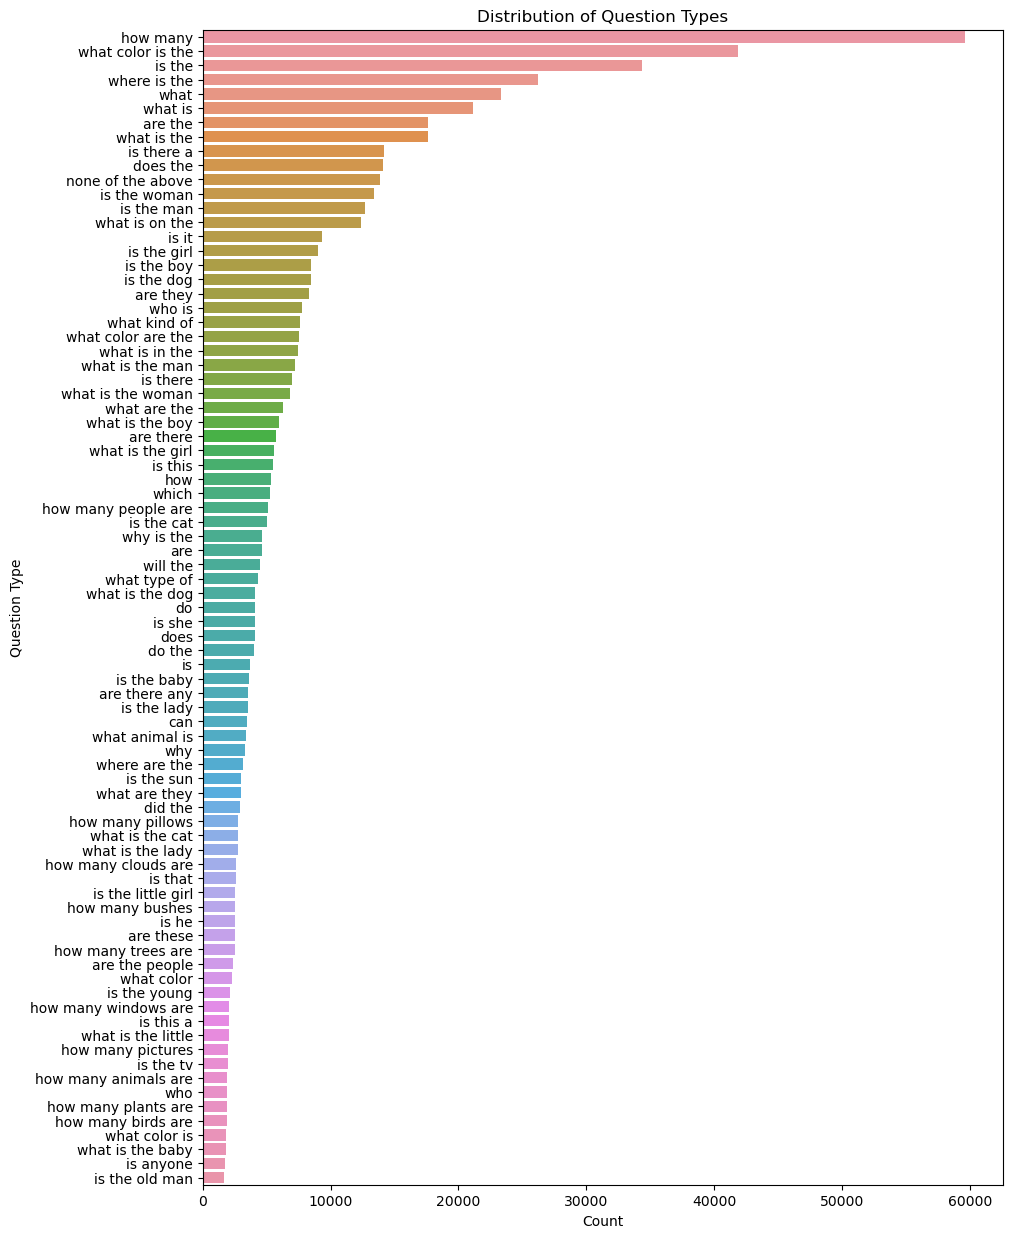

question_type
how many              59560
what color is the     41840
is the                34360
where is the          26210
what                  23290
                      ...  
how many birds are     1880
what color is          1830
what is the baby       1790
is anyone              1780
is the old man         1680
Name: count, Length: 81, dtype: int64


In [ ]:
# Count the occurrences of each question type
question_type_counts = df['question_type'].value_counts()

# Visualization
plt.figure(figsize=(20,15))
plt.subplots_adjust(left=0.5)
sns.countplot(y='question_type', data=df, order=question_type_counts.index)
plt.title('Distribution of Question Types')
plt.xlabel('Count')
plt.ylabel('Question Type')
# Your plotting code here
plt.show()

print(question_type_counts)

## Distribution of Answer Types

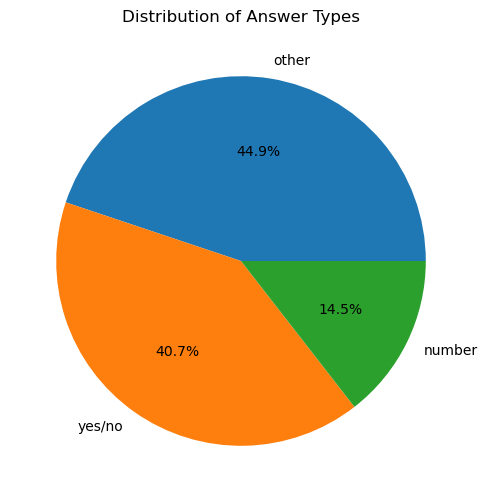

In [ ]:
# Count the occurrences of each answer type
answer_type_counts = df['answer_type'].value_counts()

# Visualization
plt.figure(figsize=(6,6))
answer_type_counts.plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Answer Types')
plt.ylabel('')
plt.show()


## Distribution of Answer Confidence

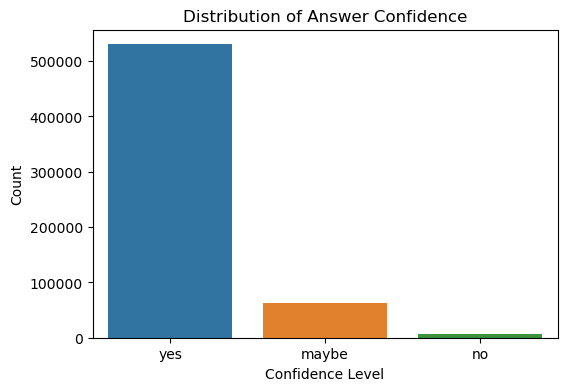

In [ ]:
# Count the answer confidence levels
confidence_counts = df['answer_confidence'].value_counts()

# Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='answer_confidence', data=df, order=['yes', 'maybe', 'no'])
plt.title('Distribution of Answer Confidence')
plt.xlabel('Confidence Level')
plt.ylabel('Count')
plt.show()


## Most Common Answers

Top 10 most common answers:
answer
yes       137644
no        105104
2          34772
1          19452
red        13599
3          13445
white       7552
4           6270
blue        5849
yellow      5270
Name: count, dtype: int64


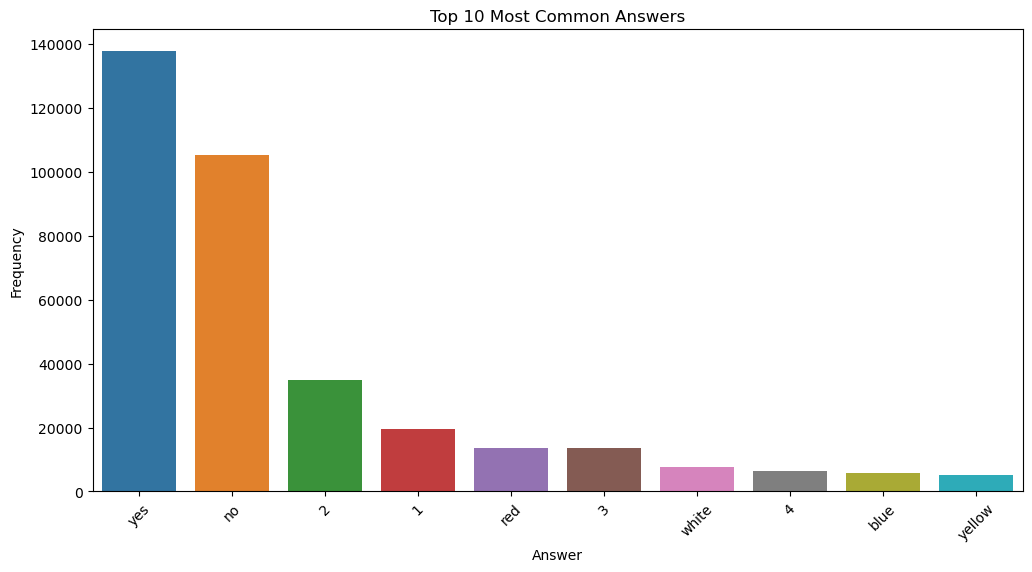

In [ ]:
# Count the occurrences of each answer
answer_counts = df['answer'].value_counts()

# Display the top 10 most common answers
print("Top 10 most common answers:")
print(answer_counts.head(10))

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x=answer_counts.head(10).index, y=answer_counts.head(10).values)
plt.title('Top 10 Most Common Answers')
plt.xlabel('Answer')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Data Preprocessing

## Handling Missing Values

In [ ]:
# Drop rows with missing values
df = df.dropna()

# Encoder

In [ ]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['answer_confidence', 'answer_type', 'question_type'])

## Process Text Data


In [ ]:
import re
import string

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove whitespace
    text = text.strip()
    return text

df['answer_processed'] = df['answer'].apply(preprocess_text)

# Model Architecture

## Image Feature Extraction

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

# Load pretrained ResNet50 model + higher level layers
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Freeze base model
base_model.trainable = False


## Text Processing

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assume max_question_length and vocab_size are defined
question_input = Input(shape=(max_question_length,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=300)(question_input)
lstm_layer = LSTM(256)(embedding_layer)


NameError: name 'max_question_length' is not defined

## Feature Fusion

In [ ]:
from tensorflow.keras.layers import concatenate, Dense

# Image features from ResNet50
image_features = base_model.output

# Combine image and text features
combined_features = concatenate([image_features, lstm_layer])

# Add Dense layers
dense_layer = Dense(256, activation='relu')(combined_features)
dense_layer = Dense(128, activation='relu')(dense_layer)


NameError: name 'lstm_layer' is not defined

## Output Layer

In [ ]:
# Assuming num_answers is the number of possible answers
output_layer = Dense(num_answers, activation='softmax')(dense_layer)


NameError: name 'num_answers' is not defined

## Compile the Model

In [ ]:
from tensorflow.keras.models import Model

model = Model(inputs=[base_model.input, question_input], outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


NameError: name 'question_input' is not defined